In [ ]:
!git clone https://github.com/getalp/ALFFA_PUBLIC.git ./ASR/AMHARIC/

Cloning into './ASR/AMHARIC'...
remote: Enumerating objects: 66024, done.
remote: Total 66024 (delta 0), reused 0 (delta 0), pack-reused 66024
Receiving objects: 100% (66024/66024), 6.54 GiB | 29.09 MiB/s, done.
Resolving deltas: 100% (12337/12337), done.
Checking out files: 100% (56925/56925), done.


In [ ]:
import os
os.chdir("/content/ASR/AMHARIC/ASR/AMHARIC")
os.listdir()

['lm', 'data', 'lang', 'kaldi-script', 'README.md']

In [ ]:
import os
import librosa   #for audio processing

In [ ]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

In [ ]:
transcription=tran_loader("/content/ASR/AMHARIC/ASR/AMHARIC/data/train/trsTrain.txt")

In [ ]:
transcription

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [ ]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [ ]:
filenames, target,duration_of_recordings = meta_data(transcription,'/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wav/')

In [ ]:
len(filenames)

10874

In [ ]:
import pandas as pd 
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [ ]:
data.head()

,key,text,duration
0,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384
1,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592
2,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736
3,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192
4,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...,8.704


In [ ]:
length_sent = []

for i in data['text']:
    length_sent.append(len(i))

In [ ]:
data['Len_sent']=pd.DataFrame(length_sent)

In [ ]:
data.head()

,key,text,duration,Len_sent
0,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384,129
1,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592,103
2,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736,27
3,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192,50
4,/content/ASR/AMHARIC/ASR/AMHARIC/data/train/wa...,ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...,8.704,69


In [ ]:
data.describe()

,duration,Len_sent
count,10874.000000,10874.000000
mean,6.631413,56.971951
std,3.068505,28.733425
min,1.792000,12.000000
25%,4.352000,34.000000
50%,5.760000,49.000000
75%,8.320000,75.000000
max,24.192000,165.000000


In [ ]:
data.duration.value_counts()

4.096     291
4.224     288
4.608     269
4.352     268
4.864     265
         ... 
22.784      1
18.560      1
18.048      1
21.632      1
20.992      1
Name: duration, Length: 152, dtype: int64

In [ ]:
len(data)

10874

In [ ]:
!pip install torchaudio

     |████████████████████████████████| 1.9 MB 4.2 MB/s 


Duration = samples/sample_rate 

In [ ]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the audio as a array and rate
  # ----------------------------
  def opens(self, audio_file_loc, sr=22000):
    samples, sample_rate = librosa.load(audio_file_loc, sr=sr)
    return (samples, sample_rate)
  def play_audio(self, samples, sample_rate):
    return ipd.Audio(samples, rate=sample_rate)

In [ ]:
open_audios = AudioUtils()

In [ ]:
samples, sample_rate = open_audios.opens(data.key[0])

In [ ]:
open_audios.play_audio(samples, sample_rate)

In [ ]:
samples.shape

(360448,)

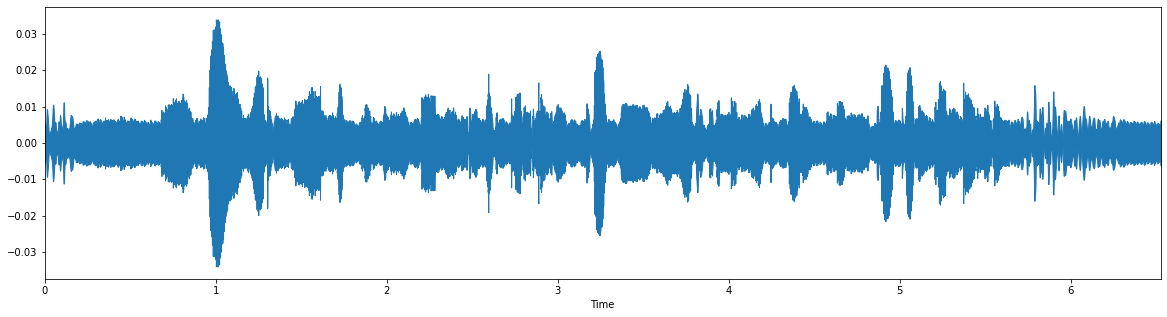

In [ ]:
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [ ]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [ ]:
spe_samples,frequency=spectrogram(samples)

In [ ]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [ ]:
spe_samples

array([[1.63114226e-03, 2.53446932e-03, 2.60442696e-03, ...,
        2.50013225e-03, 2.90512296e-03, 2.35760339e-03],
       [7.07464736e-04, 1.39987586e-03, 1.31243381e-03, ...,
        1.38515167e-03, 1.45365951e-03, 1.22152184e-03],
       [4.10463982e-06, 3.80165170e-06, 6.30050730e-10, ...,
        5.28138051e-06, 1.52566592e-07, 4.01875316e-06],
       ...,
       [8.22446703e-17, 5.74426719e-17, 6.36203863e-18, ...,
        4.28620262e-18, 1.26914166e-18, 3.10700560e-16],
       [7.99558186e-17, 1.06167660e-17, 1.78873957e-18, ...,
        2.02573238e-18, 8.63104666e-19, 2.45690711e-16],
       [4.14242203e-17, 2.75249435e-17, 6.93739677e-18, ...,
        8.18014743e-21, 8.07025248e-19, 1.50248402e-16]])

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [ ]:
import librosa

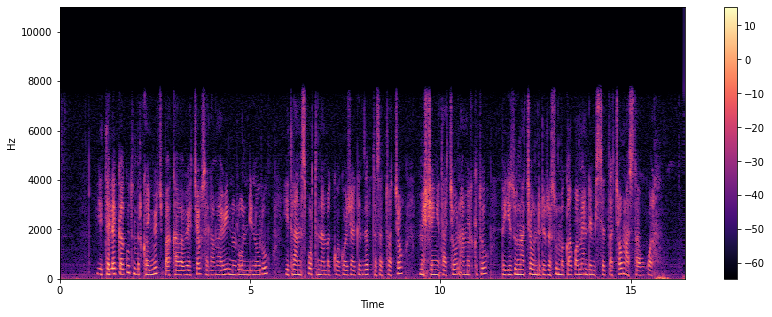

In [ ]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

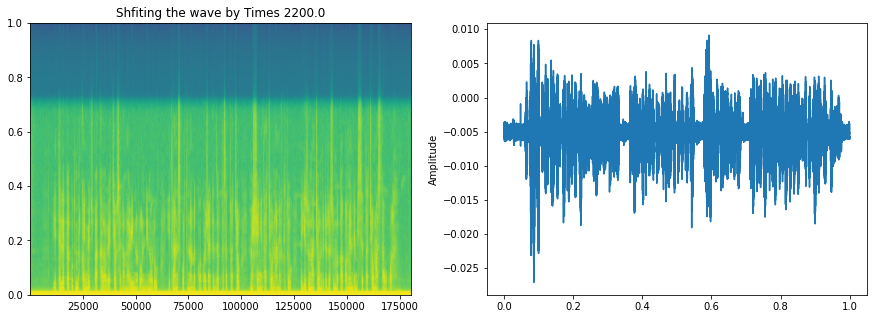

In [ ]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/100))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)